In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import numpy as np

In [5]:
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv',index_col='Date',parse_dates=True)
data.head()

/tmp/ipykernel_39374/1074598653.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv',index_col='Date',parse_dates=True)


,"Fremont Bridge Sidewalks, south of N 34th St","Fremont Bridge Sidewalks, south of N 34th St Cyclist East Sidewalk","Fremont Bridge Sidewalks, south of N 34th St Cyclist West Sidewalk"
Date,,,
2023-02-28 23:00:00,6.0,3.0,3.0
2023-02-28 22:00:00,14.0,5.0,9.0
2023-02-28 21:00:00,30.0,13.0,17.0
2023-02-28 20:00:00,37.0,22.0,15.0
2023-02-28 19:00:00,59.0,19.0,40.0


In [8]:
data.columns = ['Total','West', 'East']
data.head()


,Total,West,East
Date,,,
2023-02-28 23:00:00,6.0,3.0,3.0
2023-02-28 22:00:00,14.0,5.0,9.0
2023-02-28 21:00:00,30.0,13.0,17.0
2023-02-28 20:00:00,37.0,22.0,15.0
2023-02-28 19:00:00,59.0,19.0,40.0


In [9]:
data.dropna().describe()

,Total,West,East
count,91210.000000,91210.000000,91210.000000
mean,105.603859,47.193882,58.409977
std,133.270779,60.779588,82.619206
min,0.000000,0.000000,0.000000
25%,13.000000,6.000000,7.000000
50%,58.000000,26.000000,30.000000
75%,142.000000,65.000000,75.000000
max,1097.000000,698.000000,850.000000


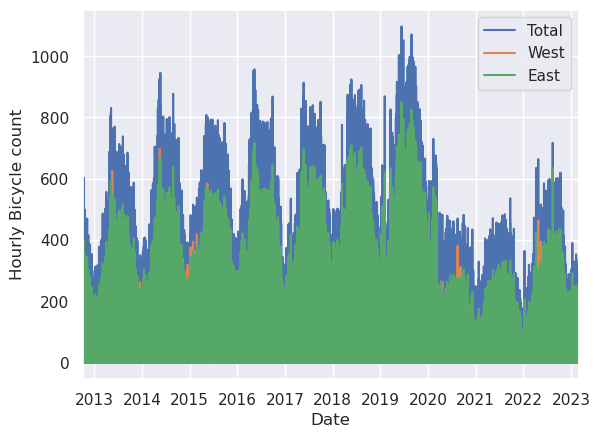

In [11]:
seaborn.set()
data.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

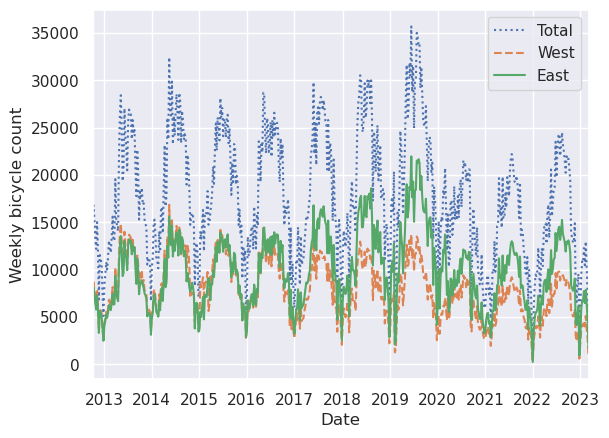

In [12]:
weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()

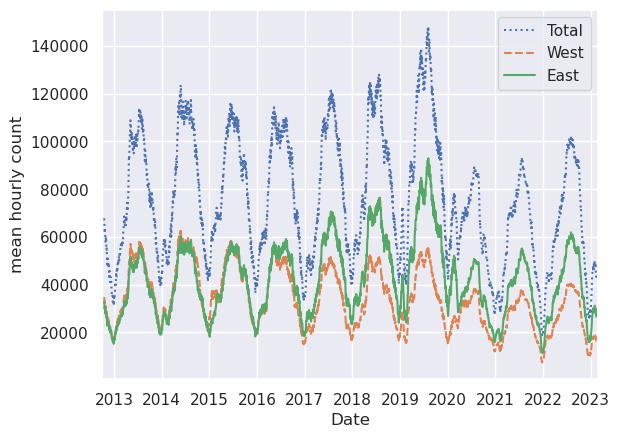

In [13]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

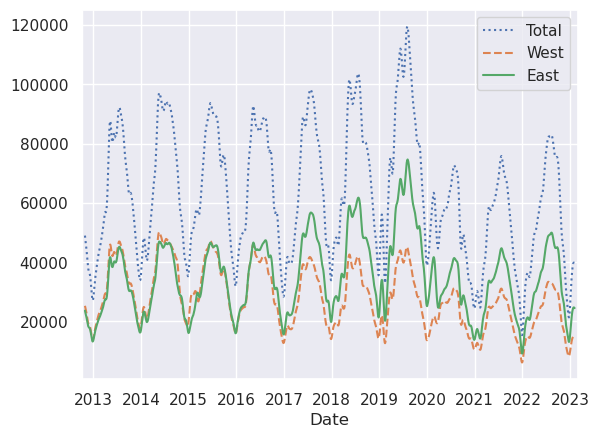

In [14]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()

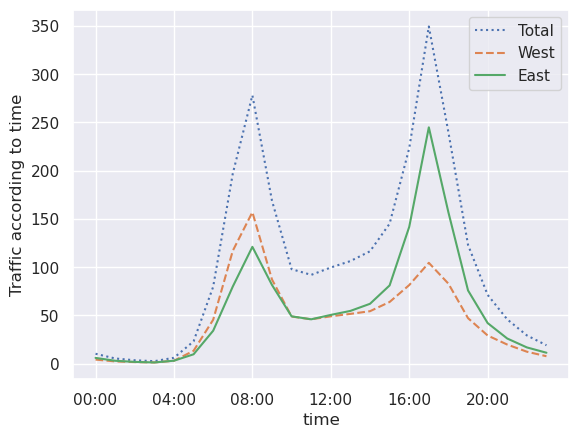

In [17]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()